In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

from wuvars.data import spreadsheet, photometry, quality_classes
from wuvars.analysis.luhman16_coord_handler import coords_from_Luhman_table

In [3]:
loc = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/c2d_MonR2/Kryukova_2012_aj428832t1_mrt.txt"

tab = astropy.table.Table.read(loc, format='ascii')

In [74]:
tab.add_column(np.arange(len(tab))+1, index=0, name='index')

In [76]:
monr2 = tab[tab['Name'] == 'Mon R2']

In [10]:
monr2_coords = coords_from_Luhman_table(monr2)

In [11]:
mon_spread = spreadsheet.load_wserv_v2(11)
mon_q = quality_classes.load_q(11)
mon_dat = photometry.group_wserv_v2(photometry.load_wserv_v2(11))

Loading WSERV11 photometry data... DONE (elapsed time: 0.31s)


Text(0.5, 1.0, 'Protostars in Mon R2: comparing our UKIRT-monitored region')

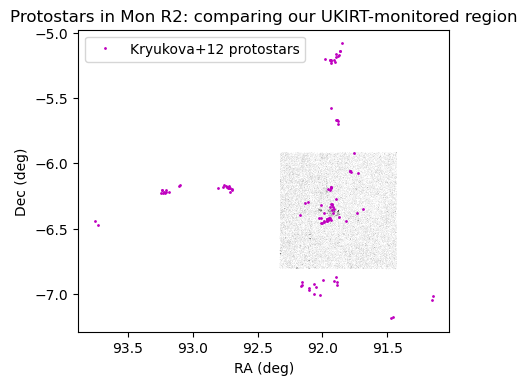

In [25]:
fig, ax = plt.subplots(1, dpi=100)

plt.plot(np.degrees(mon_spread['median']['RA']), np.degrees(mon_spread['median']['DEC']), 'k,', alpha=0.025)
plt.plot(monr2_coords.ra, monr2_coords.dec, 'm.', ms=2, label="Kryukova+12 protostars") # , scalex=False, scaley=False)

ax.set_aspect(1/np.cos(np.radians(-6.4)))
ax.invert_xaxis()
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")

ax.legend()

ax.set_title("Protostars in Mon R2: comparing our UKIRT-monitored region")

In [26]:
mon_sm = mon_spread["median"]
mon_spreadsheet_coordinates = SkyCoord(
    ra=mon_sm["RA"].values * u.rad, dec=mon_sm["DEC"].values * u.rad
)

In [28]:
idx, d2d, d3d = monr2_coords.match_to_catalog_sky(mon_spreadsheet_coordinates)


In [87]:
sokol_idx, sokol_d2d, sokol_d3d = sokol_proto_coords.match_to_catalog_sky(mon_spreadsheet_coordinates)


(array([ 1.,  6., 17.,  9.,  6.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

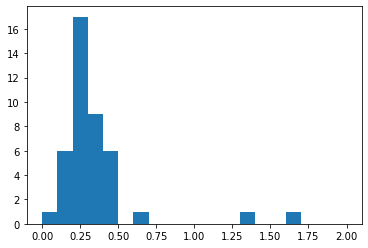

In [31]:
plt.subplots(1)
# plt.hist(d2d.to(u.arcsec).value, bins=50, range=(0,1), label='All NGC 1333 members')
plt.hist(d2d.to(u.arcsec).value, range=(0, 2), bins=20)

(array([0., 1., 2., 1., 4., 4., 1., 2., 2., 0., 1., 2., 2., 1., 0., 2., 3.,
        2., 1., 0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

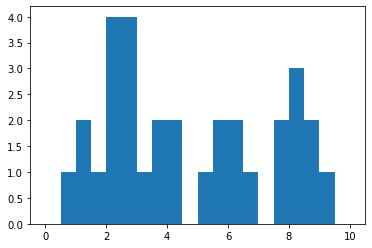

In [89]:
plt.subplots(1)
# plt.hist(d2d.to(u.arcsec).value, bins=50, range=(0,1), label='All NGC 1333 members')
plt.hist(sokol_d2d.to(u.arcsec).value, range=(0, 10), bins=20)

# looks like Sokol isn't helpful.

In [77]:
max_sep = 0.5 * u.arcsec
sep_constraint = d2d < max_sep

# We're going to compute
# (a) all matched IC348 members, for quality control / comparisons, and
# (b) just the brown dwarfs

matches = mon_sm.iloc[idx[sep_constraint]]
matched = monr2[sep_constraint]

In [78]:
matches

,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,HAPERMAG3,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
SOURCEID,,,,,,,,,,,,,,,,,,,,,
45195940882456,57498.233804,1.600250,-0.110830,0.886533,0.155289,1.323406,0.111682,18.758604,0.111104,17.930027,...,16.581913,0.049790,0.0,0.0,0.0,1.0,0.003067,0.983819,0.970488,0.969743
45195940912937,57499.252958,1.600975,-0.106073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.226006,0.092387,NaN,NaN,0.0,1.0,0.050000,0.983193,0.966970,0.970359
45195940900509,57496.733632,1.600996,-0.111342,1.060341,0.270495,0.971643,0.212837,19.749649,0.198471,18.653749,...,17.692110,0.121292,0.0,0.0,0.0,-1.0,0.900000,0.983277,0.968912,0.970724
45195940912813,57499.252958,1.601489,-0.103401,NaN,NaN,2.481479,0.214292,NaN,NaN,18.698359,...,16.302380,0.040579,NaN,0.0,0.0,-1.0,0.486486,0.981697,0.964571,0.969088
45195940910910,57499.252958,1.601908,-0.105830,1.563782,0.130744,2.038729,0.054970,18.445070,0.114169,17.111919,...,14.990565,0.016126,0.0,0.0,0.0,1.0,0.000171,0.981697,0.964571,0.969088
45195940910989,57498.742648,1.601973,-0.105694,1.826439,0.032666,1.534174,0.022775,16.713936,0.024265,14.903908,...,13.374398,0.010095,0.0,0.0,0.0,1.0,0.052478,0.981773,0.964387,0.969016
45195940910935,57498.742648,1.602051,-0.105806,1.449108,0.032325,1.232316,0.023905,16.613245,0.022552,15.179688,...,13.949826,0.010929,0.0,16.0,16.0,1.0,0.000171,0.981773,0.964387,0.969016
45195940901643,57500.745944,1.602572,-0.112456,NaN,NaN,1.954359,0.151620,NaN,NaN,18.597343,...,16.690296,0.049481,NaN,0.0,0.0,1.0,0.050000,0.981773,0.965123,0.969136
45195940899279,57498.742648,1.603485,-0.111920,3.423397,0.191917,2.615606,0.040737,19.519833,0.169511,16.842949,...,14.207936,0.011673,0.0,0.0,0.0,1.0,0.003067,0.981773,0.964387,0.969016


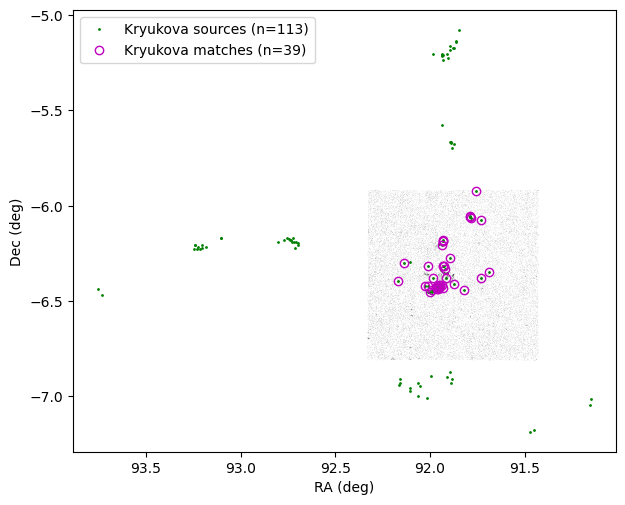

In [41]:
fig, ax = plt.subplots(1, figsize=(7,7), dpi=100)

plt.plot(np.degrees(mon_sm['RA']), np.degrees(mon_sm['DEC']), 'k,', alpha=0.03)
plt.plot(monr2_coords.ra, monr2_coords.dec, 'g.', ms=2, label=f'Kryukova sources (n={len(monr2)})')
plt.plot(np.degrees(matches['RA']), np.degrees(matches['DEC']), 'mo', markerfacecolor='None', label=f'Kryukova matches (n={len(matches)})')

ax.set_aspect(1/np.cos(np.radians(-6.4)))
ax.invert_xaxis()
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")

ax.legend()


In [79]:
matched

index,Name,f_Name,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,3.6mag,e_3.6mag,4.5mag,e_4.5mag,5.8mag,e_5.8mag,8.0mag,e_8.0mag,24mag,e_24mag,f_24mag,alpha,logL
,,,h,min,s,,deg,arcmin,arcsec,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,dex(Lsun)
int64,str13,str1,int64,int64,float64,str1,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64
620,Mon R2,--,6,6,45.0,-,6,21,0.31,--,--,--,--,--,--,14.55,0.01,13.65,0.01,12.7,0.02,11.59,0.03,7.74,0.03,--,0.35,-1.32
621,Mon R2,--,6,6,54.97,-,6,4,39.04,--,--,--,--,--,--,12.99,0.01,11.65,0.01,10.6,0.01,9.39,0.01,4.9,0.01,--,0.9,-0.02
622,Mon R2,--,6,6,55.27,-,6,22,46.09,--,--,--,--,--,--,15.96,0.04,15.08,0.02,13.92,0.07,12.11,0.06,7.39,0.04,--,1.27,-0.93
623,Mon R2,--,6,7,2.04,-,5,55,27.85,--,--,--,--,--,--,14.15,0.01,13.01,0.01,12.15,0.01,11.33,0.01,7.3,0.02,--,0.31,-1.18
624,Mon R2,--,6,7,7.8,-,6,3,48.87,--,--,16.21,0.21,14.34,0.08,12.51,0.01,10.56,0.01,9.59,0.01,7.87,0.01,2.04,0.01,--,2.0,1.378
625,Mon R2,--,6,7,8.69,-,6,3,20.76,16.69,0.14,14.74,0.05,13.55,0.03,11.83,0.01,10.95,0.01,10.24,0.01,9.12,0.01,4.82,0.01,--,0.46,-0.07
627,Mon R2,--,6,7,9.77,-,6,3,44.28,16.5,0.13,15.04,0.12,13.83,0.06,12.43,0.01,11.55,0.01,10.74,0.01,9.6,0.01,4.44,0.01,--,0.96,0.169
628,Mon R2,--,6,7,16.92,-,6,26,35.61,--,--,--,--,--,--,14.81,0.02,13.99,0.03,13.72,0.13,--,--,6.83,0.02,--,1.03,-0.95


In [45]:
# also checking Sokol

sokol_loc = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/c2d_MonR2/Sokol_2019_Table1_sty3107_supplemental_table.txt"
sokol = astropy.table.Table.read(sokol_loc, format='ascii.latex')

In [48]:
sokol_protostars = sokol[sokol['Protostar?'] == 'Y']

In [54]:
sokol_proto_coords = SkyCoord(ra=sokol_protostars['RA'], dec=sokol_protostars['Dec'], unit=('hour', 'deg'))

In [55]:
sokol_proto_coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(91.43583333, -7.16241667), (91.28458333, -7.24363889),
     (91.45416667, -7.17811111), (91.47458333, -7.18783333),
     (91.15375   , -7.04694444), (92.15833333, -6.92944444),
     (92.22541667, -7.02733333), (92.10416667, -6.96169444),
     (91.88333333, -6.90930556), (91.90791667, -6.90502778),
     (92.13875   , -6.88388889), (92.01625   , -7.01002778),
     (92.17583333, -6.96083333), (91.995     , -7.07586111),
     (92.05375   , -6.94516667), (91.88791667, -6.92211111),
     (92.15666667, -6.90916667), (92.13708333, -6.98486111),
     (91.84625   , -6.75444444), (92.3025    , -6.7295    ),
     (91.24      , -6.58766667), (91.38458333, -6.49919444),
     (93.72875   , -6.36716667), (93.69291667, -6.37008333),
     (93.82208333, -6.41369444), (91.94125   , -6.38255556),
     (91.93166667, -6.38466667), (91.93208333, -6.39230556),
     (91.93375   , -6.39925   ), (91.9475    , -6.36366667),
     (91.94041667, -6.40283333), (91.94333333, -6.

Text(0.5, 1.0, 'Comparing Sokol & Kryukova protostars')

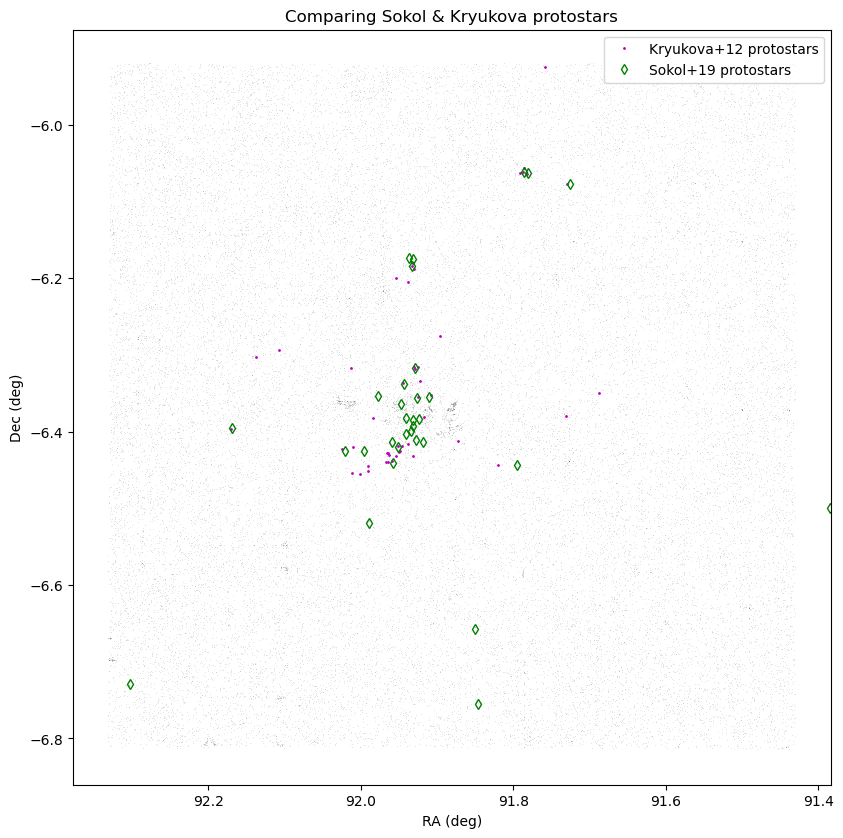

In [67]:
fig, ax = plt.subplots(1, figsize=(10,10), dpi=100)

plt.plot(np.degrees(mon_spread['median']['RA']), np.degrees(mon_spread['median']['DEC']), 'k,', alpha=0.1)
ax.invert_xaxis()

ax.plot(monr2_coords.ra, monr2_coords.dec, 'm.', ms=2, label="Kryukova+12 protostars", scalex=False, scaley=False)
ax.plot(sokol_proto_coords.ra, sokol_proto_coords.dec, 'gd', ms=5, mfc='None', label="Sokol+19 protostars", scalex=False, scaley=False)

ax.set_aspect(1/np.cos(np.radians(-6.4)))
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")

ax.legend()

ax.set_title("Comparing Sokol & Kryukova protostars")

In [68]:
kryukova_match_sids = matches.index

In [69]:
kryukova_match_sids

Int64Index([45195940882456, 45195940912937, 45195940900509, 45195940912813,
            45195940910910, 45195940910989, 45195940910935, 45195940901643,
            45195940899279, 45195940863213, 45195940888875, 45195940863458,
            45195940863492, 45195940867046, 45195940867056, 45195940863573,
            45195940891508, 45195940863570, 45195940863588, 45195940889449,
            45195940866107, 45195940889471, 45195940892275, 45195940889555,
            45195940891442, 45195940889591, 45195940889645, 45195940889580,
            45195940892289, 45195940889661, 45195940889579, 45195940888862,
            45195940889680, 45195940891595, 45195940889479, 45195940864698,
            45195940889526, 45195940878929, 45195940903063],
           dtype='int64', name='SOURCEID')

In [70]:
from wuvars.plotting.lightcurve import monr2_simple_lc_scatter_brokenaxes


In [71]:
def q_string(sid, spread, qualityset):
    
    q = qualityset
    
    if sid in spread[q.q2].index:
        return "2"

    elif sid in spread[q.q1_j | q.q1_h | q.q1_k].index:
        return_string = "1"

        if sid in spread[q.q1_j].index:
            return_string += "J"
        if sid in spread[q.q1_h].index:
            return_string += "H"            
        if sid in spread[q.q1_k].index:
            return_string += "K"
            
        return return_string
            
    elif sid in spread[q.q0].index:
        return "0"
    
    else:
        return "-1"

0 45195940882456


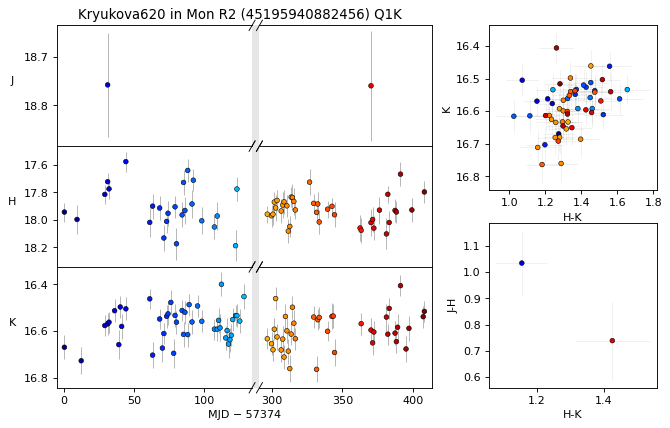

1 45195940912937


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


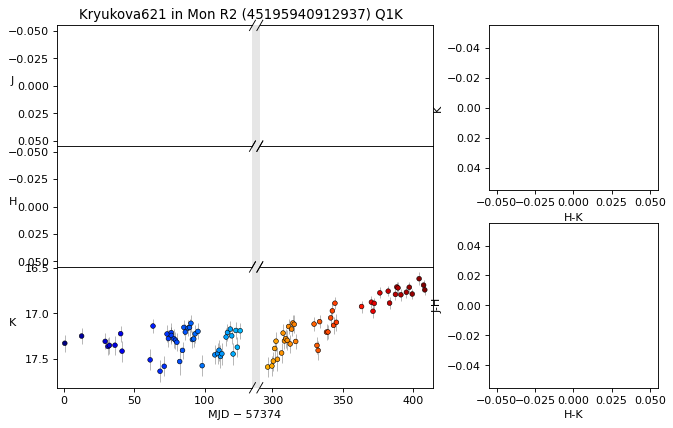

2 45195940900509


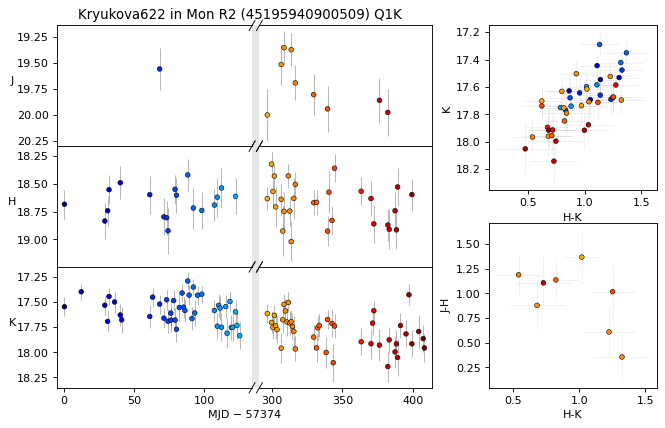

3 45195940912813


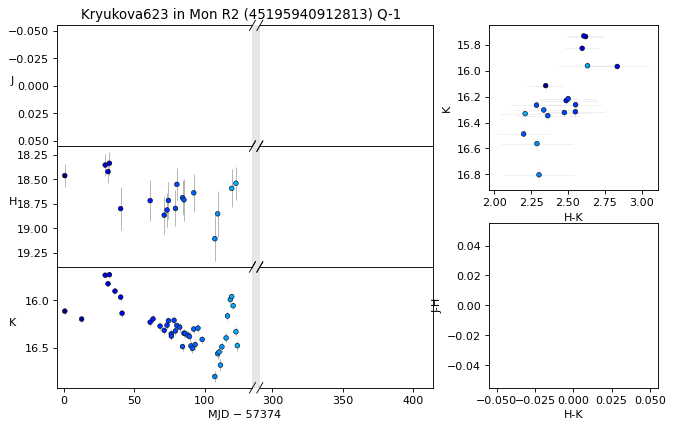

4 45195940910910


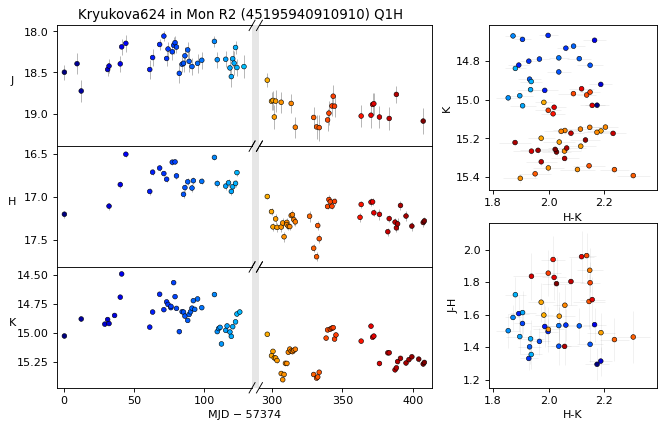

5 45195940910989


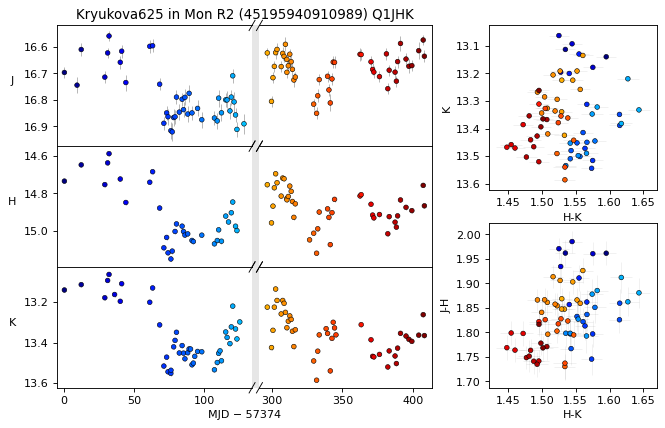

6 45195940910935


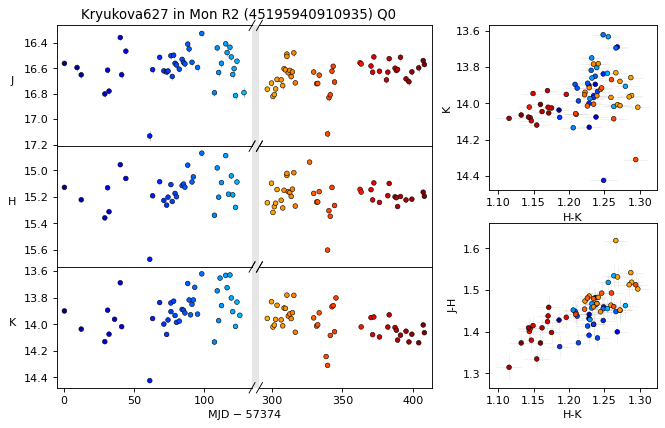

7 45195940901643


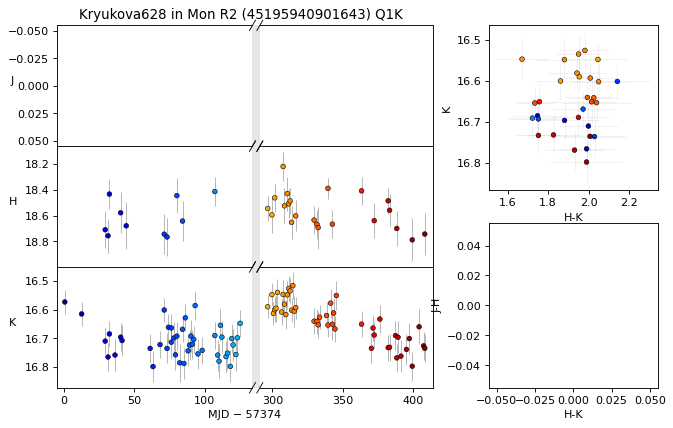

8 45195940899279


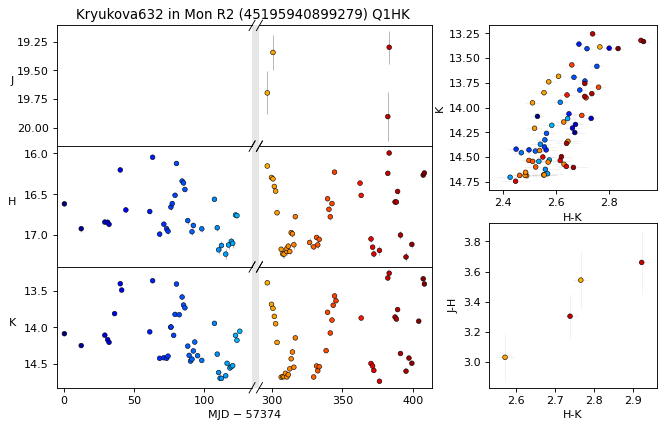

9 45195940863213


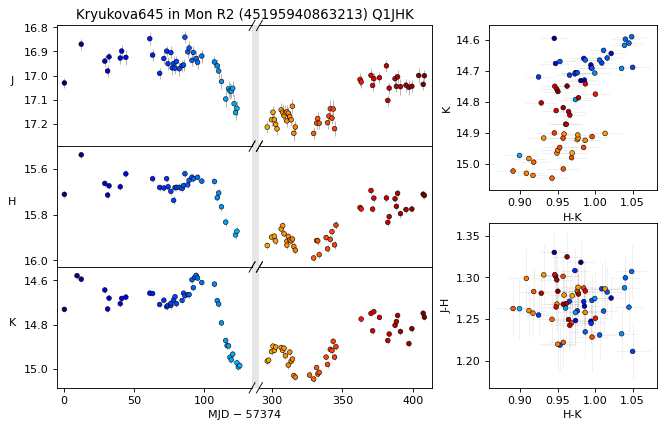

10 45195940888875


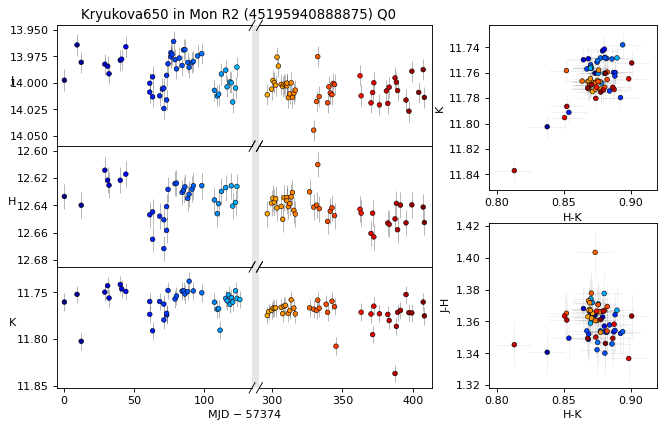

11 45195940863458


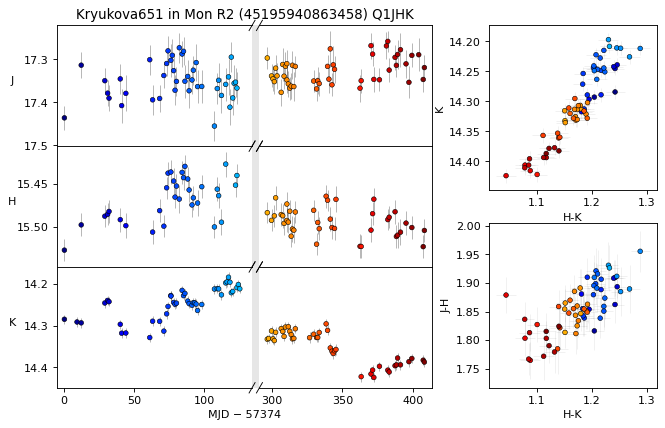

12 45195940863492


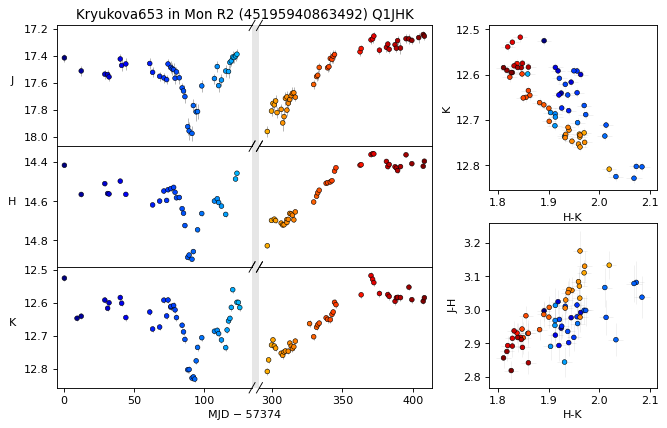

13 45195940867046


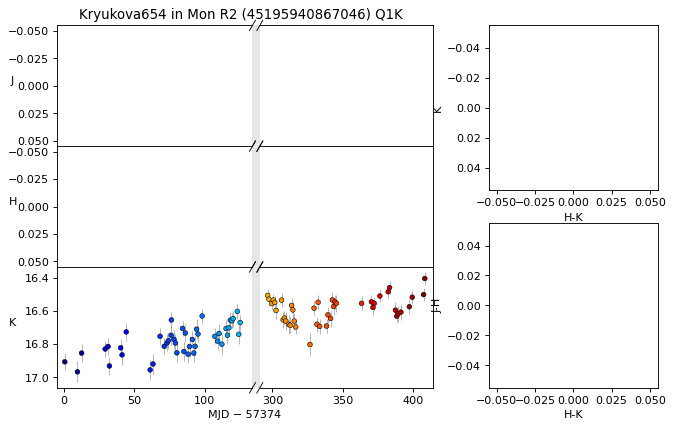

14 45195940867056


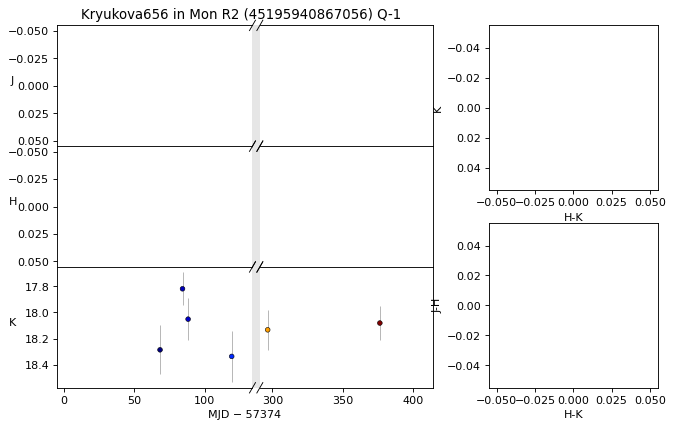

15 45195940863573


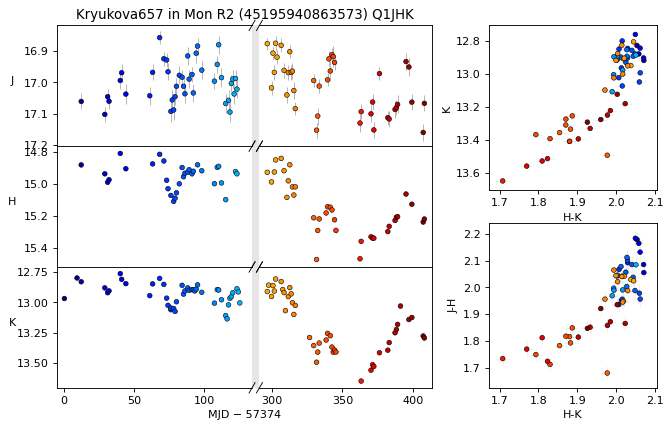

16 45195940891508


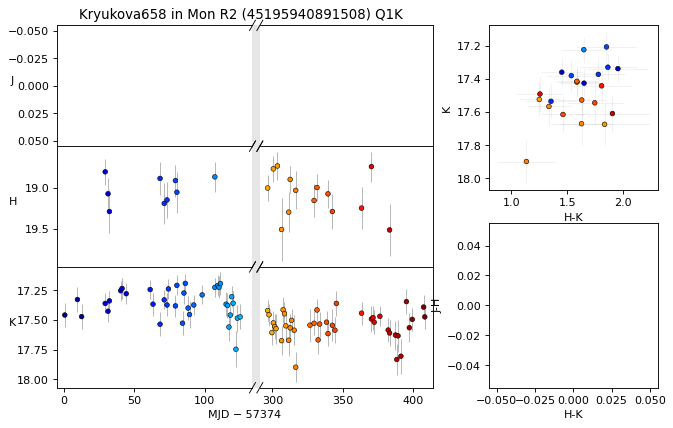

17 45195940863570


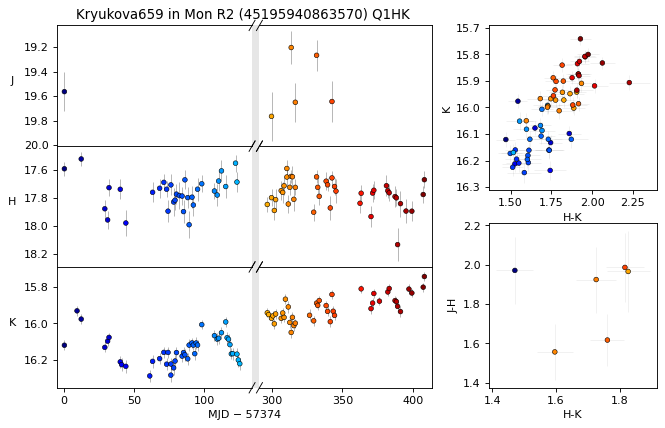

18 45195940863588


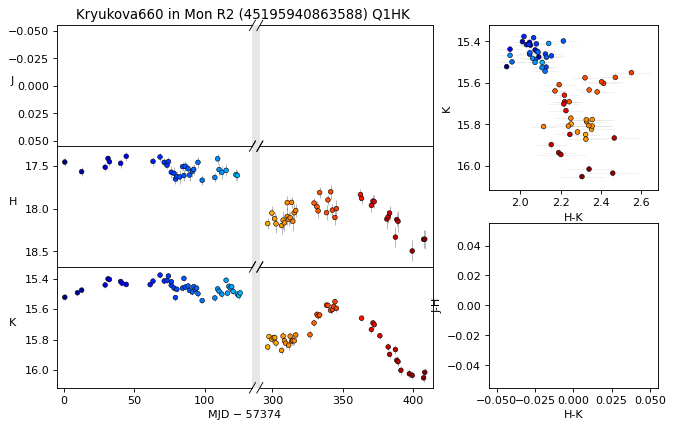

19 45195940889449


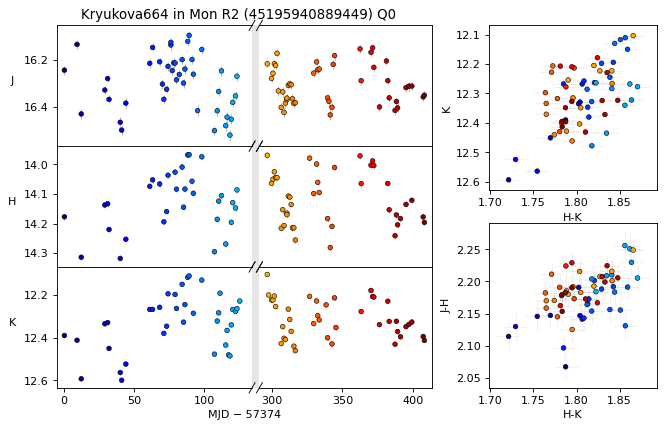

20 45195940866107


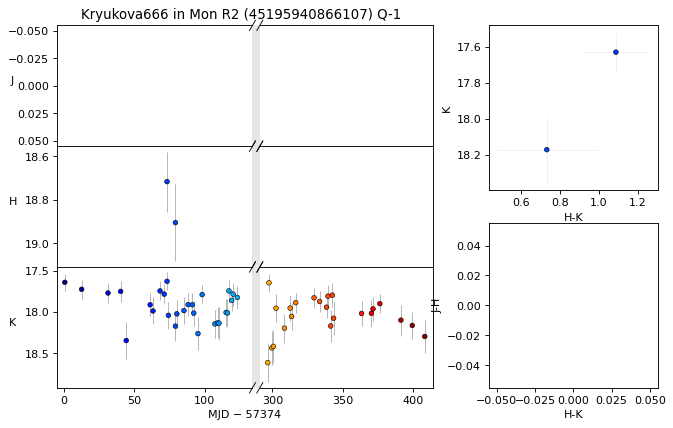

21 45195940889471


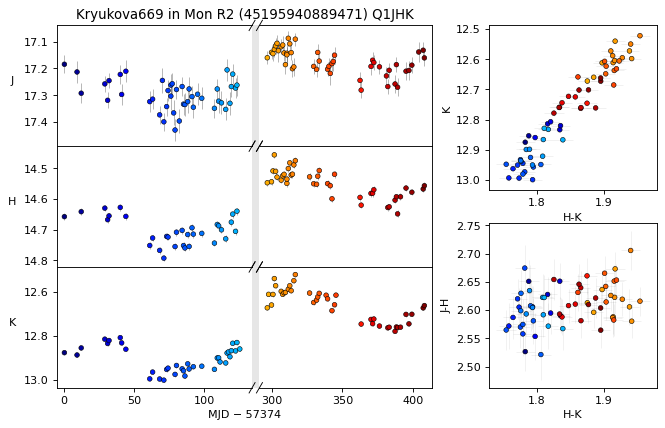

22 45195940892275


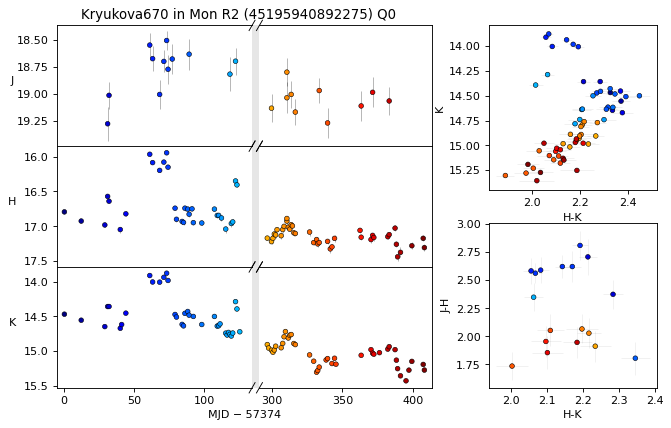

23 45195940889555


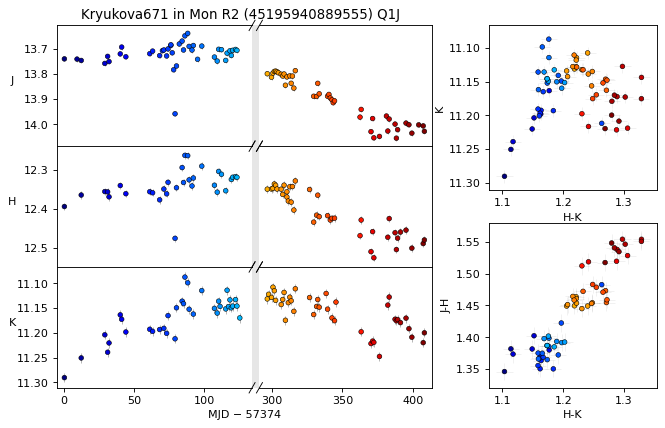

24 45195940891442


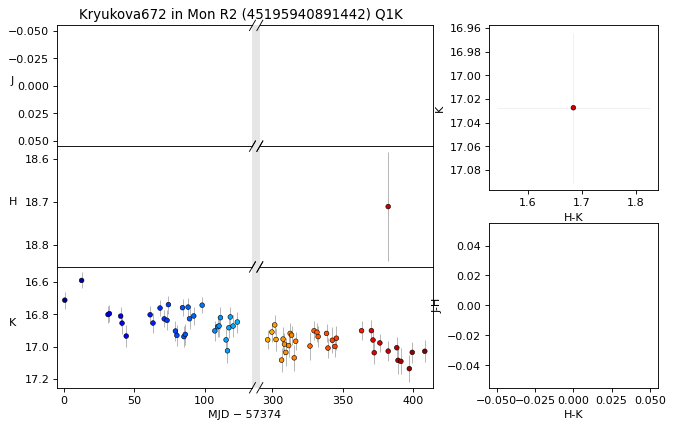

25 45195940889591


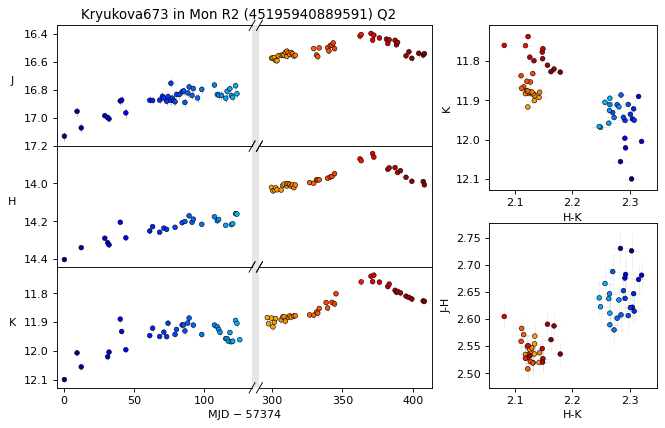

26 45195940889645


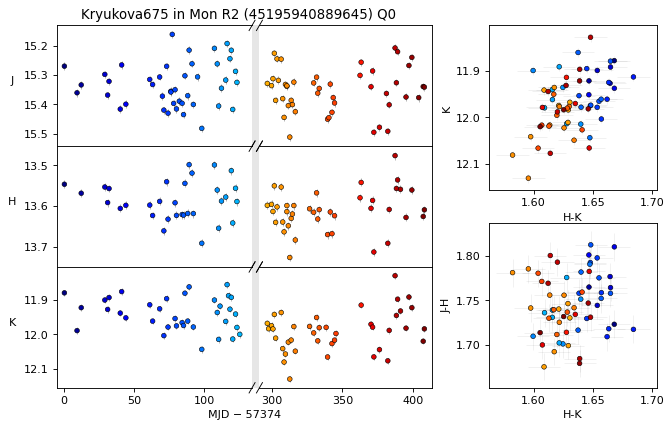

27 45195940889580


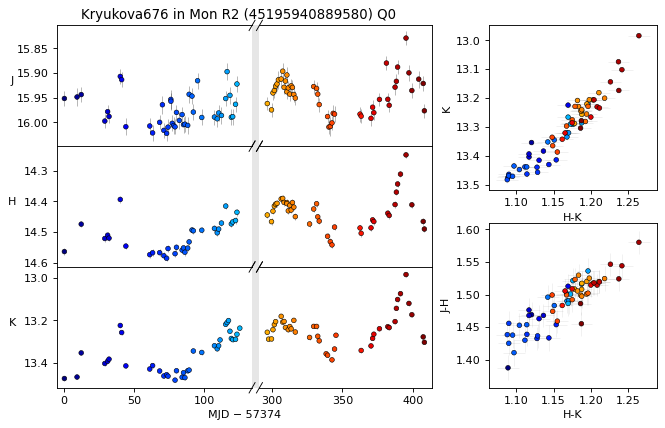

28 45195940892289


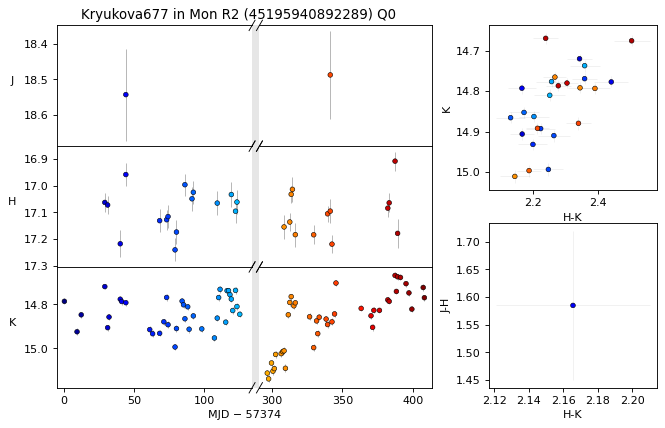

29 45195940889661


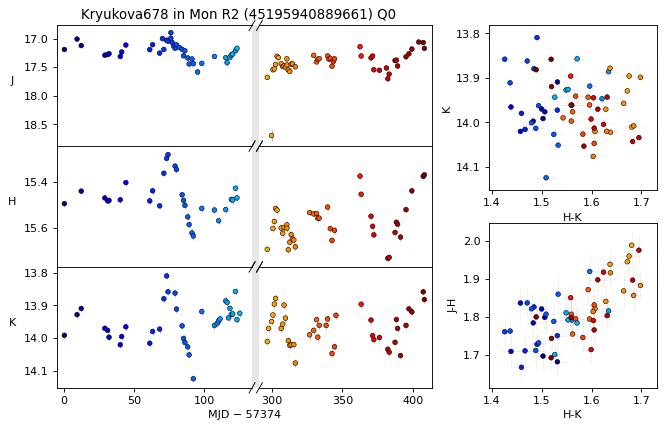

30 45195940889579


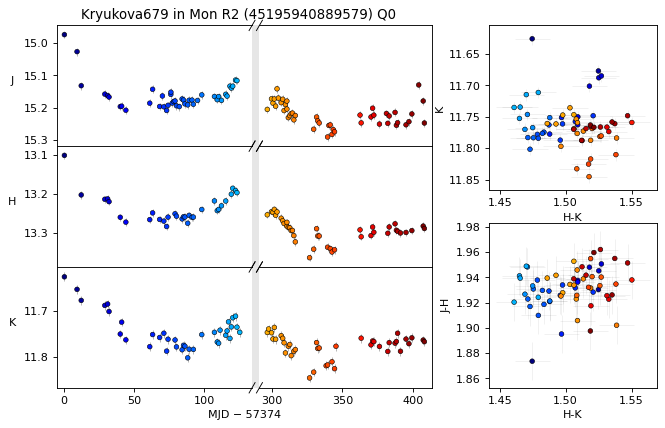

31 45195940888862


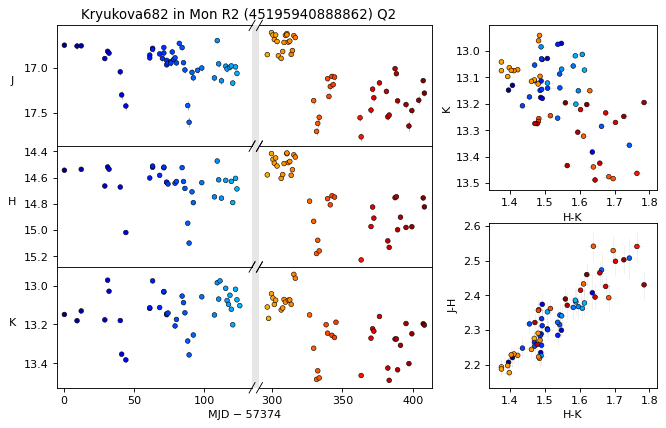

32 45195940889680


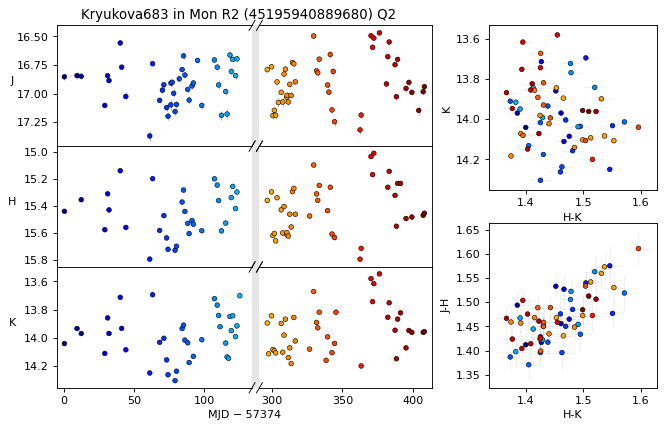

33 45195940891595


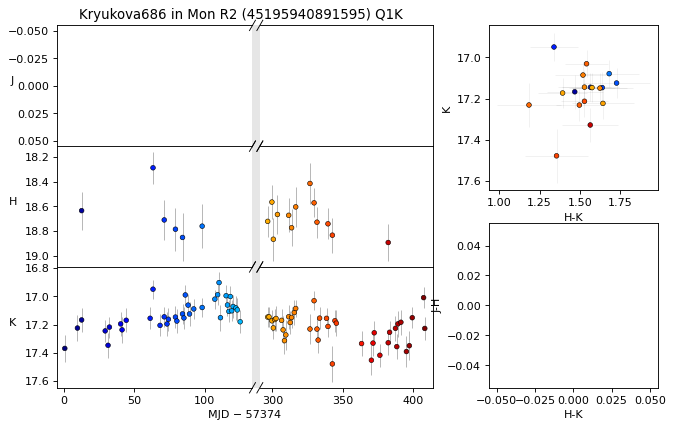

34 45195940889479


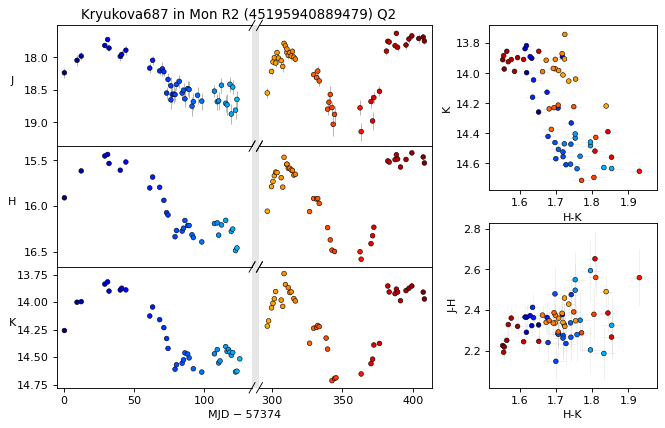

35 45195940864698


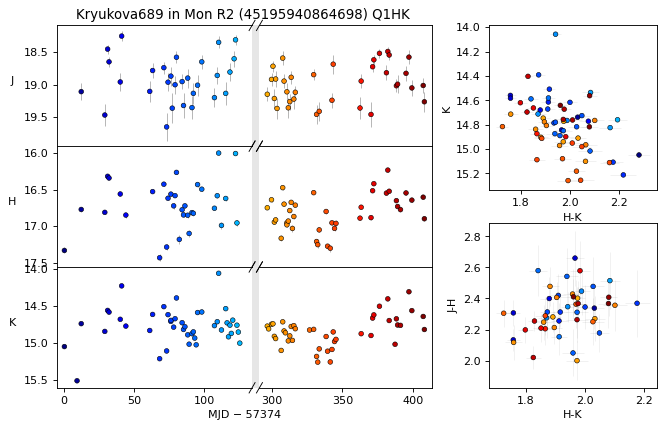

36 45195940889526


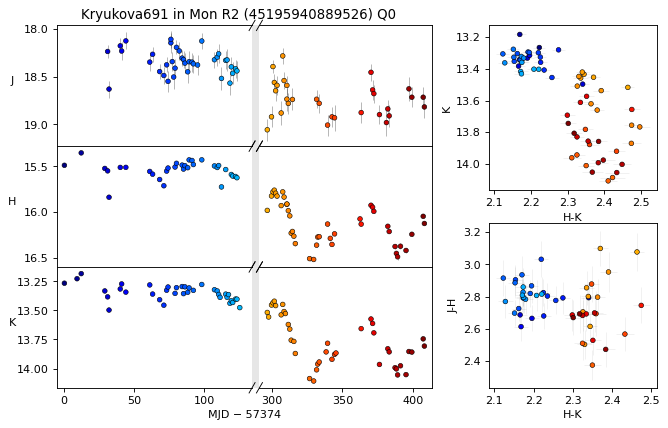

37 45195940878929


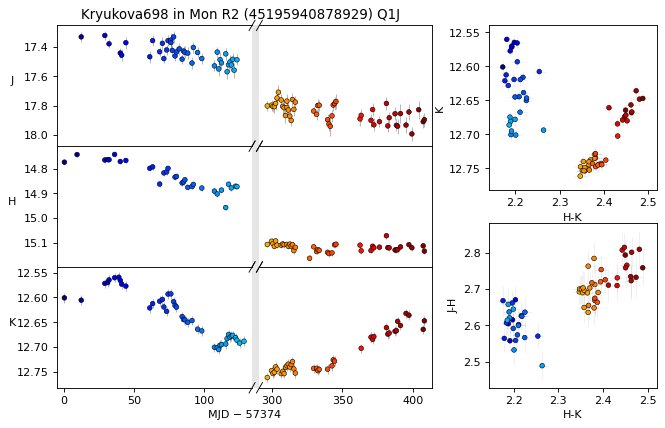

38 45195940903063


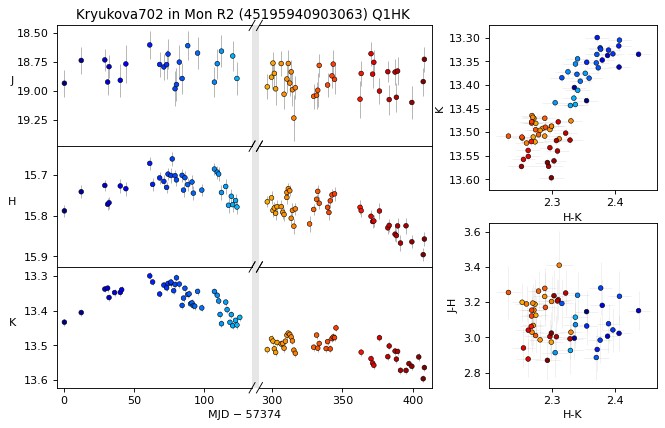

In [85]:
#     data_quality_text = f"Q{q_string(sid, spread, q):4s}  "


for i, sid in enumerate(kryukova_match_sids):

    print(i, sid)
    fig_lc = monr2_simple_lc_scatter_brokenaxes(mon_dat, sid, cmap='jet')
    fig_lc.ax_j.set_title(f"Kryukova{matched['index'][i]} in Mon R2 ({sid}) Q{q_string(sid, mon_spread, mon_q):4s}")
        
            
    plt.show()
    
    
    

In [ ]:
# I might want to compare with Gutermuth et al. 2009 eventually!